<a href="https://colab.research.google.com/github/encoder43/Heartfailure_predictor/blob/main/Heartfailure_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries(Standard Inputs)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pydrive
from pydrive.drive import GoogleDrive
from google.colab import auth

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# **Loading the data frame**

In [7]:
dataframe=pd.read_csv('/content/drive/MyDrive/data/heart.csv')

In [8]:
dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **ANALYSIS**

In [9]:
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
dataframe.shape

(918, 12)

In [11]:
dataframe.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [12]:
dataframe.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# **Dividing it in to input and output**

In [18]:
#X=dataframe.drop(['HeartDisease'],axis=1)
X=dataframe.iloc[:,:-1].values

In [19]:
X

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [20]:
Y=dataframe.iloc[:,-1].values

In [21]:
Y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

# **Datapreprocessing**

In [26]:
label1=LabelEncoder()
label2=LabelEncoder()
label6=LabelEncoder()
label8=LabelEncoder()
label10=LabelEncoder()
X[:,1]=label1.fit_transform(X[:,1])
X[:,2]=label2.fit_transform(X[:,2])
X[:,6]=label6.fit_transform(X[:,6])
X[:,8]=label8.fit_transform(X[:,8])
X[:,10]=label10.fit_transform(X[:,10])

In [27]:
X

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

# **Split the data in to Train and Test**

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
X_train

array([[70, 1, 0, ..., 1, 2.0, 1],
       [46, 1, 0, ..., 1, 1.5, 1],
       [65, 0, 2, ..., 0, 0.8, 2],
       ...,
       [57, 0, 0, ..., 0, 0.0, 2],
       [64, 1, 0, ..., 1, 4.0, 0],
       [47, 1, 2, ..., 0, 0.0, 2]], dtype=object)

# **Feature scalling**

In [33]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

# **Traing the Dataset**

In [44]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred_lr=LR.predict(X_test)

In [43]:
SVM=SVC()
SVM.fit(X_train,Y_train)
Y_pred_svm=SVM.predict(X_test)

In [48]:
KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train,Y_train)
Y_pred_knn=KNN.predict(X_test)

In [52]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
Y_pred_dt=DT.predict(X_test)

In [58]:
RF=RandomForestClassifier(n_estimators=150)
RF.fit(X_train,Y_train)
Y_pred_rf=RF.predict(X_test)

In [61]:
XGB=XGBClassifier()
XGB.fit(X_train,Y_train)
Y_pred_xgb=XGB.predict(X_test)

# **Testing Accuracy**

In [62]:
lr_acc=accuracy_score(Y_test,Y_pred_lr)
svm_acc=accuracy_score(Y_test,Y_pred_svm)
KNN_acc=accuracy_score(Y_test,Y_pred_knn)
DT_acc=accuracy_score(Y_test,Y_pred_dt)
RF_acc=accuracy_score(Y_test,Y_pred_rf)
XGB_acc=accuracy_score(Y_test,Y_pred_xgb)

In [63]:
print(lr_acc)
print(svm_acc)
print(KNN_acc)
print(DT_acc)
print(RF_acc)
print(XGB_acc)

0.8369565217391305
0.8641304347826086
0.8478260869565217
0.7445652173913043
0.8532608695652174
0.8532608695652174


# **Plotting accuracy of different algoritms**

Text(0, 0.5, 'Accuracy')

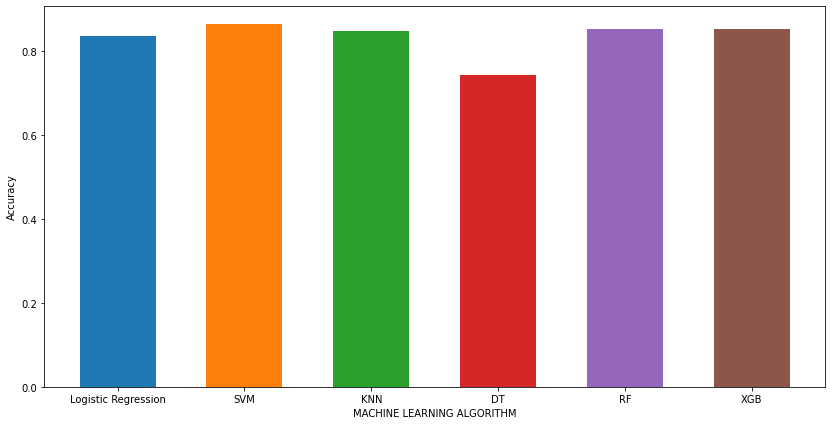

In [64]:
plt.figure(figsize=(14,7))
plt.bar("Logistic Regression",lr_acc,width=0.6)
plt.bar("SVM",svm_acc,width=0.6)
plt.bar("KNN",KNN_acc,width=0.6)
plt.bar("DT",DT_acc,width=0.6)
plt.bar("RF",RF_acc,width=0.6)
plt.bar("XGB",XGB_acc,width=0.6)
plt.xlabel('MACHINE LEARNING ALGORITHM')
plt.ylabel('Accuracy')


Lets try testing our model with the random values and see how it predicts

In [65]:
result = RF.predict(ss.transform([[40,1,2,110,290,1,2,160,0,2.2,1]]))
if result == [0]:
    print('Person Not Having Heart Disease')
else:
    print("Person Having Heart Disease")

Person Having Heart Disease
